In [6]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Loading dataset
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

In [10]:
dataset.shape

(400, 5)

In [11]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [13]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Text(0.5, 1.0, 'Age distribution')

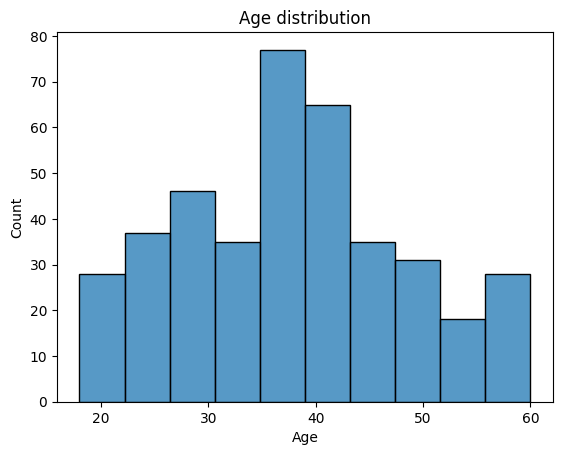

In [14]:
sns.histplot(dataset.Age)
plt.title('Age distribution')

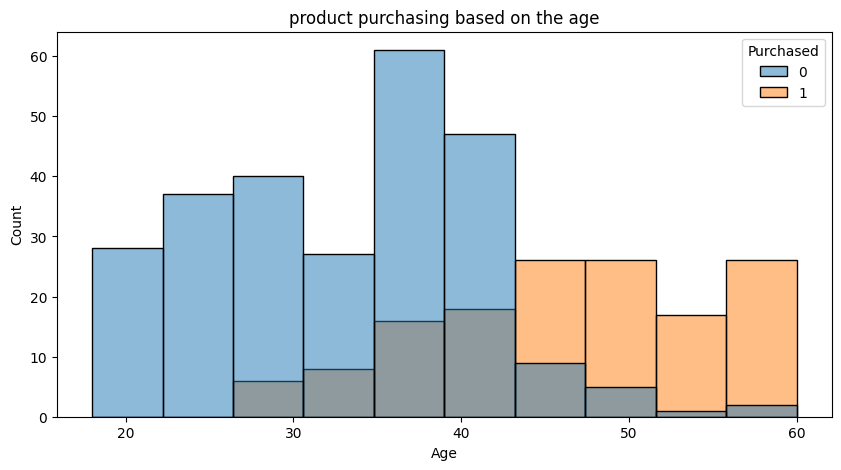

In [15]:
plt.figure(figsize=(10,  5))
plt.title('product purchasing based on the age')
sns.histplot(x='Age', hue='Purchased', data=dataset)
plt.show()

In [16]:
dataset['Gender']=dataset['Gender'].replace(['Male', 'Female'], [0,1])

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [17]:
X = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, 4].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [23]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifier.fit(X_train_s, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1]


In [25]:
print(y_train)

[0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1
 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


In [26]:
print(X_train)

[[     0     26  15000]
 [     0     60 102000]
 [     1     38 112000]
 [     0     40 107000]
 [     1     42  53000]
 [     0     35  59000]
 [     0     48  41000]
 [     1     48 134000]
 [     1     38 113000]
 [     0     29 148000]
 [     1     26  15000]
 [     0     60  42000]
 [     0     24  19000]
 [     0     42 149000]
 [     1     46  96000]
 [     0     28  59000]
 [     0     39  96000]
 [     0     28  89000]
 [     0     41  72000]
 [     0     45  26000]
 [     1     33  69000]
 [     1     20  82000]
 [     0     31  74000]
 [     0     42  80000]
 [     1     35  72000]
 [     1     33 149000]
 [     0     40  71000]
 [     1     51 146000]
 [     0     46  79000]
 [     0     35  75000]
 [     0     38  51000]
 [     1     36  75000]
 [     1     37  78000]
 [     0     38  61000]
 [     1     60 108000]
 [     1     20  82000]
 [     0     57  74000]
 [     0     42  65000]
 [     0     26  80000]
 [     0     46 117000]
 [     0     35  61000]
 [     1     21 

In [ ]:
len(X_train)

280

In [27]:
print(X_test)

[[     0     30  87000]
 [     1     38  50000]
 [     0     35  75000]
 [     1     30  79000]
 [     1     35  50000]
 [     0     27  20000]
 [     1     31  15000]
 [     0     36 144000]
 [     1     18  68000]
 [     0     47  43000]
 [     0     30  49000]
 [     1     28  55000]
 [     0     37  55000]
 [     0     39  77000]
 [     0     20  86000]
 [     1     32 117000]
 [     0     37  77000]
 [     0     19  85000]
 [     1     55 130000]
 [     0     35  22000]
 [     1     35  47000]
 [     1     47 144000]
 [     1     41  51000]
 [     0     47 105000]
 [     1     23  28000]
 [     1     49 141000]
 [     1     28  87000]
 [     0     29  80000]
 [     1     37  62000]
 [     1     32  86000]
 [     0     21  88000]
 [     0     37  79000]
 [     0     57  60000]
 [     0     37  53000]
 [     0     24  58000]
 [     0     18  52000]
 [     0     22  81000]
 [     1     34  43000]
 [     1     31  34000]
 [     1     49  36000]
 [     0     27  88000]
 [     0     41 

In [ ]:
len(X_test)

120

In [28]:
# Predicting the Test set results
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 1 1]


In [29]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1]


In [30]:
from sklearn import metrics

# Calculate accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f\n\n' % (acc))

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm, '\n\n')

# Print a separator line
print('---------------------------------------------')

# Calculate and print classification report
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)





Accuracy: 0.90


Confusion matrix:
[[71  8]
 [ 4 37]] 


---------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        79
           1       0.82      0.90      0.86        41

    accuracy                           0.90       120
   macro avg       0.88      0.90      0.89       120
weighted avg       0.90      0.90      0.90       120



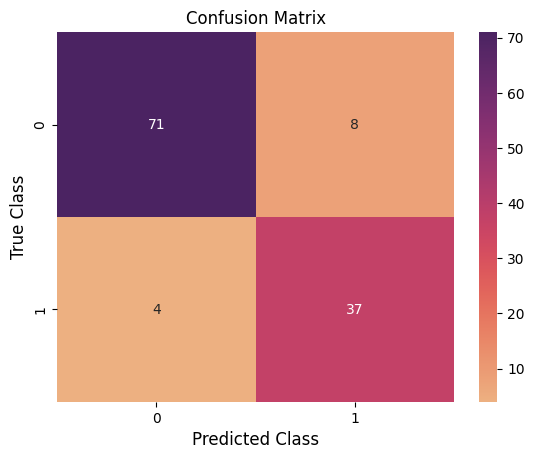

In [31]:
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)

plt.show()
